<a href="https://colab.research.google.com/github/ayshahaneena/Breast-Cancer-Classification/blob/main/Advance_Project_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [2]:
# load the data
df = pd.read_csv('/content/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Checking the missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

* 'M'  ---> malignant (cancerous) ---> 1
* 'B'  --->  benign (non-cancerous) ----> 0

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

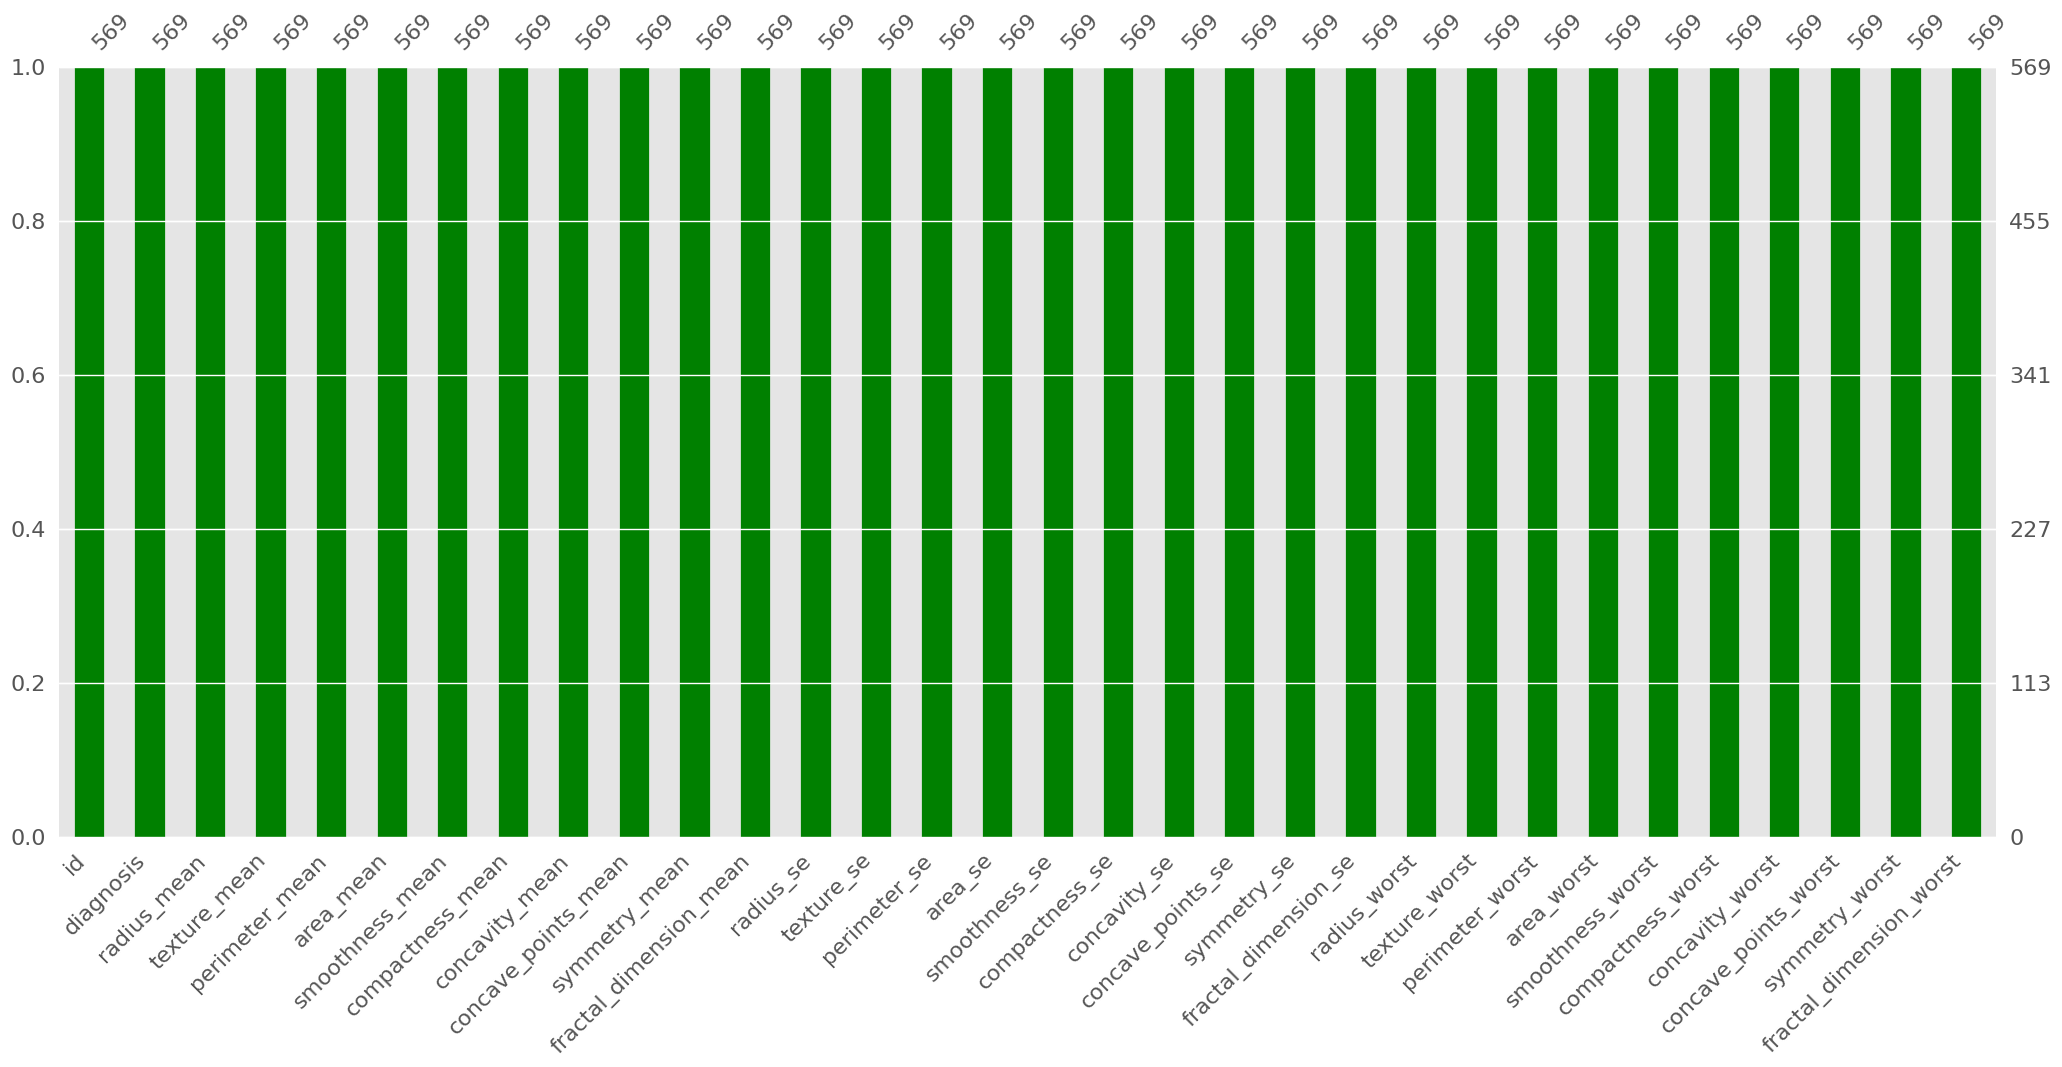

In [10]:
msno.bar(df,color='green')

* There are no missing values in the dataset

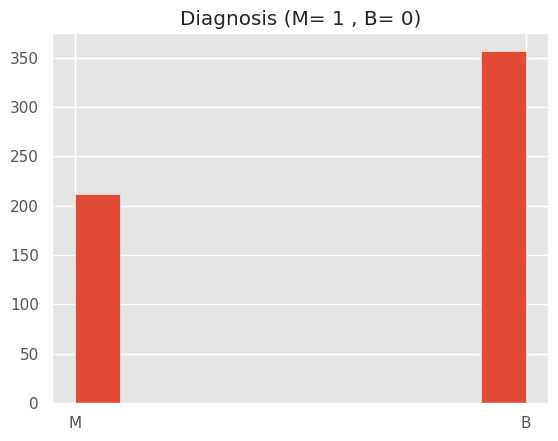

In [11]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M= 1 , B= 0)')
plt.show()

In [12]:
df['diagnosis'] = df['diagnosis'].apply(lambda x : 1 if x== "M" else 0)

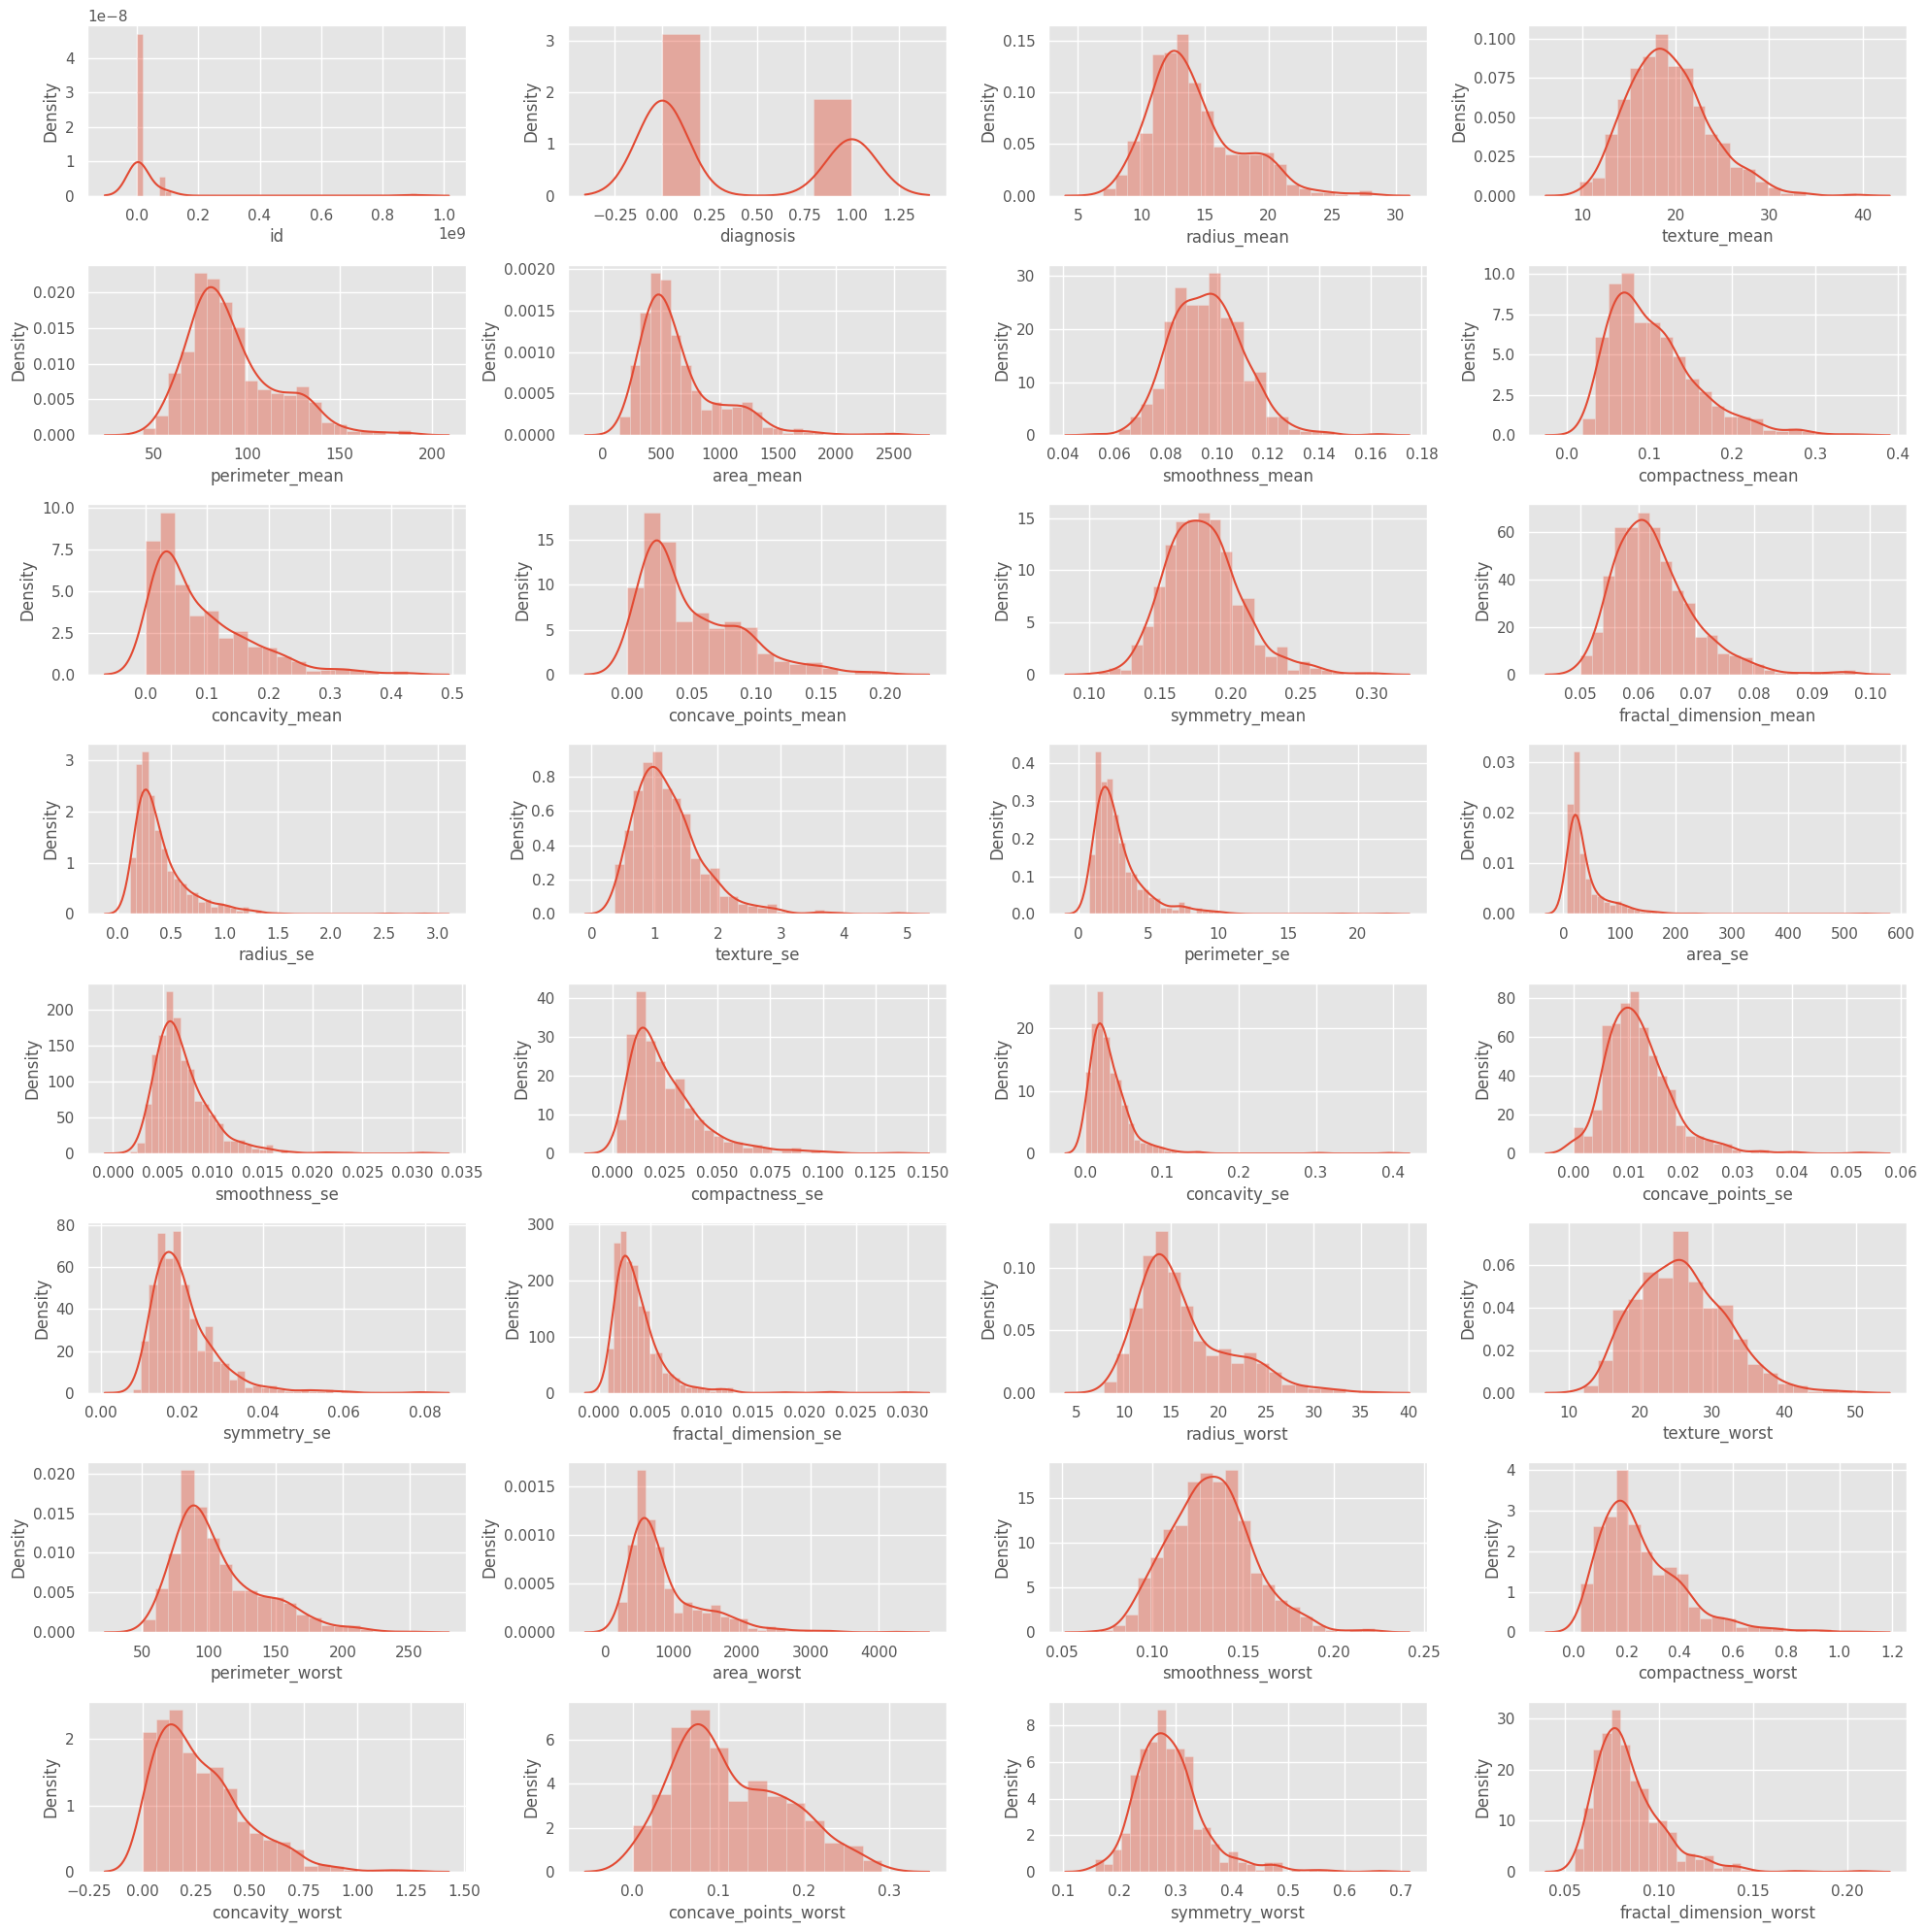

In [13]:
# Density Graph
# Each 5 rows its having 6 columns
plt.figure(figsize=(20,20))
plot_count = 1
for column in df:
   if plot_count <= 32:
      ax = plt.subplot(8,4 ,plot_count)
      sns.distplot(df[column])
      plt.xlabel(column)
   plot_count += 1

plt.tight_layout()
plt.show()

In [14]:
# Correlation
correlation = df.corr()
correlation

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


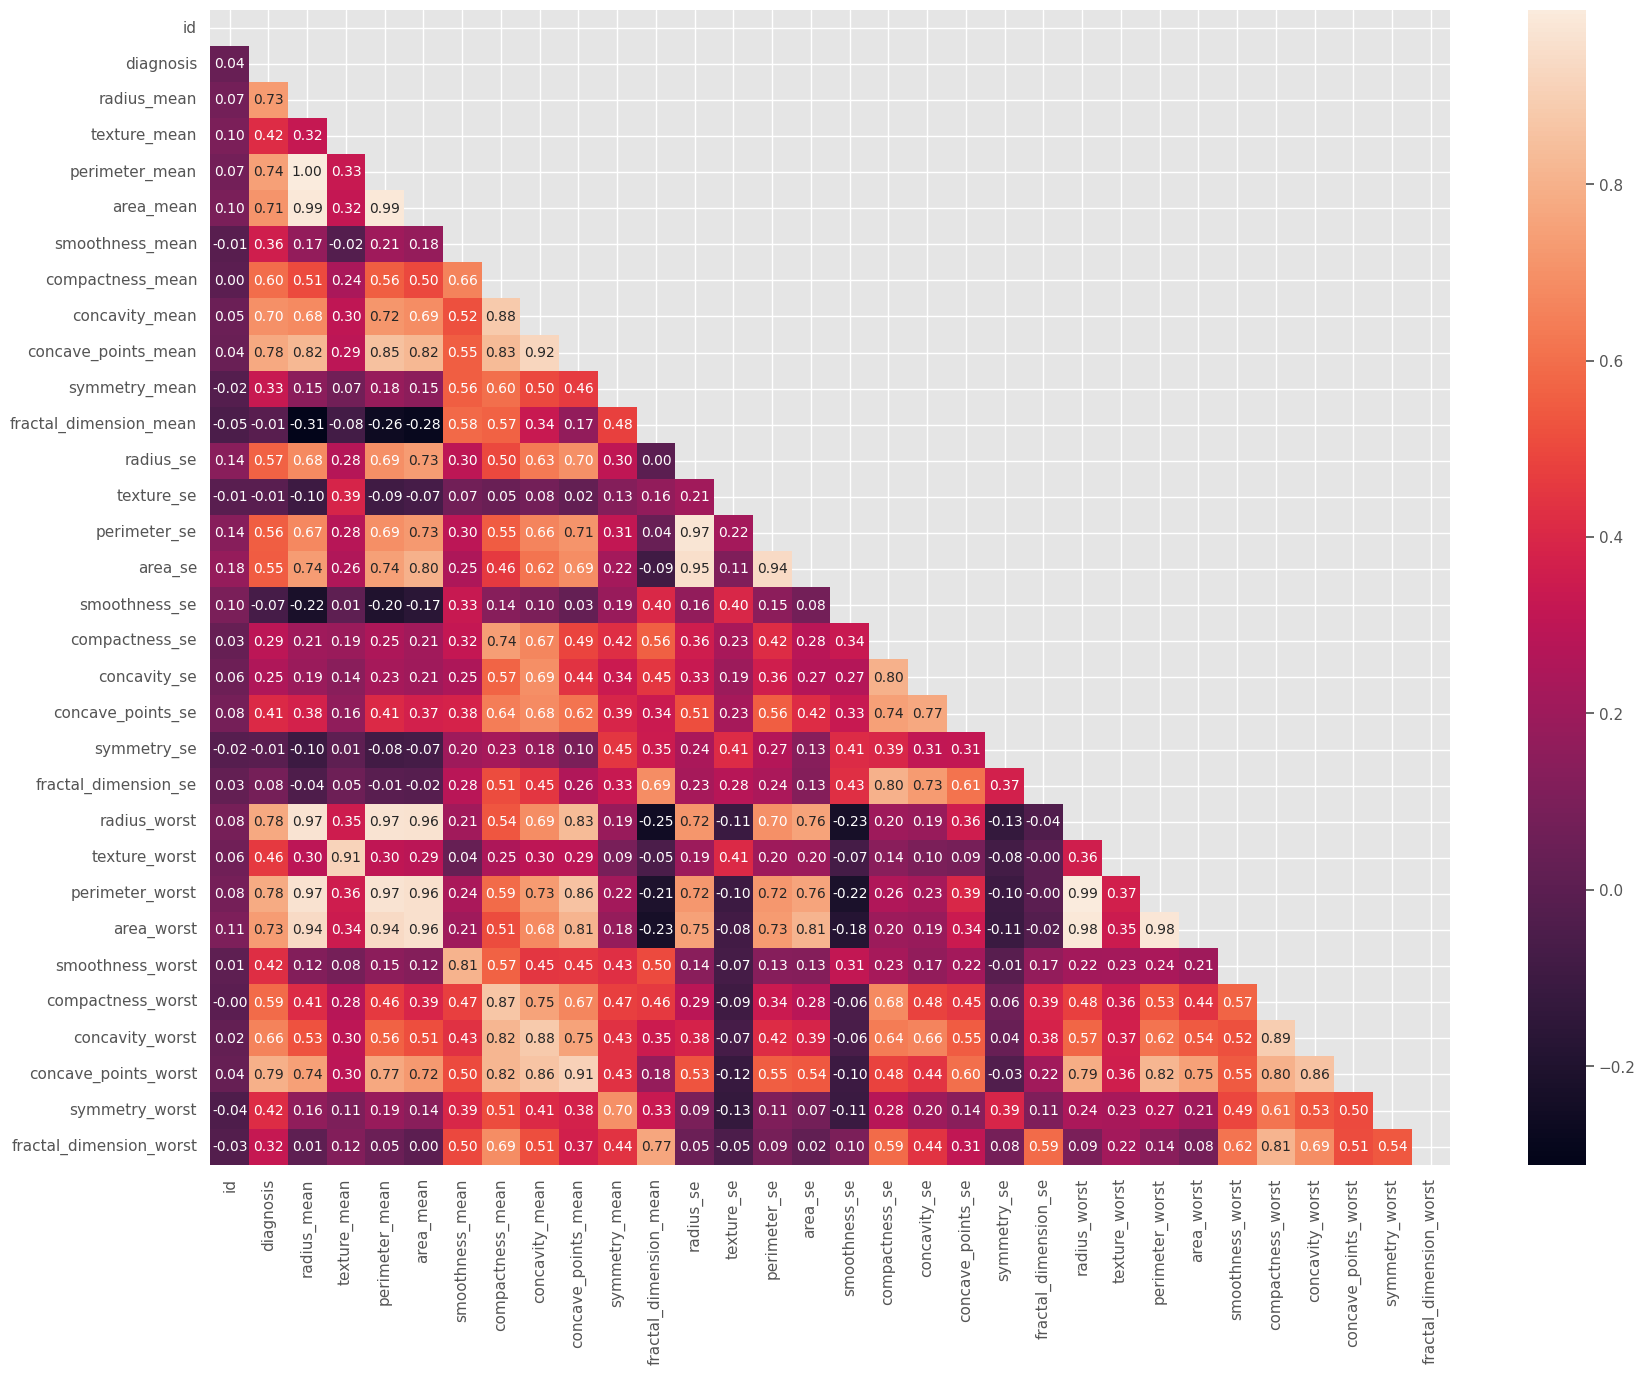

In [15]:
# Heatmap
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(correlation,dtype=bool))
sns.heatmap(correlation , mask = mask , annot = True , fmt = '.2f')
plt.show()

# Dropping Highly correlated columns
Dropping highly correlated columns can improve the performance and interpretability of your machine learning model as it reduce Multicollinearity

In [16]:
# Compute the Correlation Matrix: This shows the correlation coefficients between pairs of features without the sign
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(correlation, dtype=bool))
tri_df = corr_matrix.mask(mask)
to_drop = [ col for col in tri_df.columns if any(tri_df[col] > 0.92)]

In [17]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [18]:
df.shape[1]

32

In [19]:
df = df.drop(to_drop, axis=1)

In [20]:
# New df no.of columns
df.shape[1]

24

In [21]:
df.drop('id',axis=1,inplace=True)

In [22]:
df.shape[1]

23

In [23]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [24]:
# Independent Variable
X = df.drop('diagnosis',axis=1)
# Dependent Variable
y = df['diagnosis']

In [25]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,  y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(X_train.shape)
print(X_test.shape)

(455, 22)
(114, 22)


## Models Creation

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [29]:
# Prediction
y_pred = lr.predict(X_test)

In [30]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [31]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [32]:
# Evaluation
train_acc = accuracy_score(y_train , lr.predict(X_train))
test_acc_lr = accuracy_score(y_test , y_pred)
print(f'Train LR Accuracy : {train_acc}')
print(f"Test LR Accuracy : {test_acc_lr}")


Train LR Accuracy : 0.989010989010989
Test LR Accuracy : 0.9649122807017544


In [33]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[66  1]
 [ 3 44]]


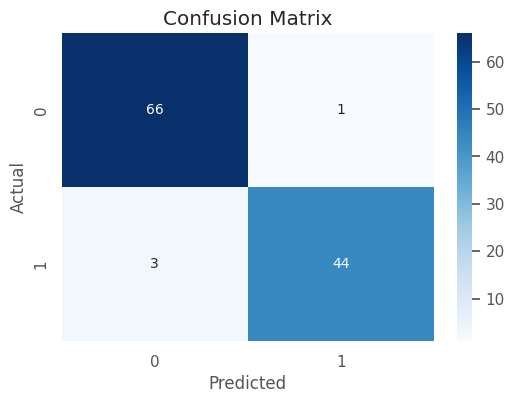

In [34]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
report = classification_report(y_test,y_pred,output_dict=True)
print(report)

{'0': {'precision': 0.9565217391304348, 'recall': 0.9850746268656716, 'f1-score': 0.9705882352941176, 'support': 67}, '1': {'precision': 0.9777777777777777, 'recall': 0.9361702127659575, 'f1-score': 0.9565217391304347, 'support': 47}, 'accuracy': 0.9649122807017544, 'macro avg': {'precision': 0.9671497584541062, 'recall': 0.9606224198158145, 'f1-score': 0.9635549872122762, 'support': 114}, 'weighted avg': {'precision': 0.9652851936604796, 'recall': 0.9649122807017544, 'f1-score': 0.9647888903845291, 'support': 114}}


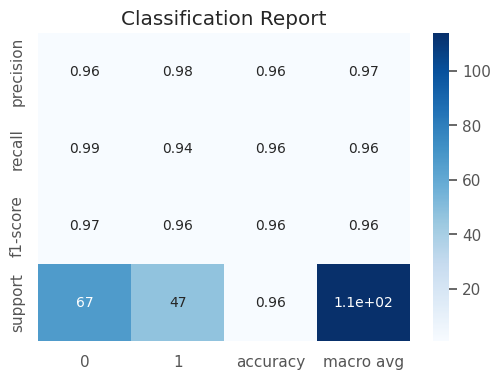

In [36]:
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(6, 4))
# Plot classification report
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

## KNN

In [37]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn.predict(X_test)

In [39]:
train_acc = accuracy_score(y_train , knn.predict(X_train))
test_acc_knn = accuracy_score(y_test , y_pred)
print(f'Train KNN Accuracy : {train_acc}')
print(f"Test KNN Accuracy : {test_acc_knn}")

Train KNN Accuracy : 0.967032967032967
Test KNN Accuracy : 0.956140350877193


In [40]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[66  1]
 [ 4 43]]


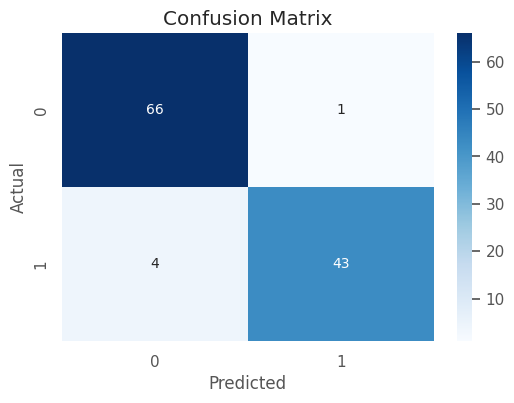

In [41]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## SVC

In [43]:
# SVC
# Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability=True)

parameters = {
    'gamma' : [0.00001, 0.0001 , 0.001 , 0.01 , 0.1] ,
    'C' : [0.10, 0.1, 0.01, 0.001, 0.0001 , 1 , 10 , 15 , 20 , 50 ] ,

}
grid_search = GridSearchCV(svc , parameters)
grid_search.fit(X_train , y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 0.1, 0.01, 0.001, 0.0001, 1, 10, 15, 20,
                               50],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]})

In [44]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [45]:
grid_search.best_score_

0.9802197802197803

In [46]:
svc = SVC(C=15 , gamma=0.01 , probability=True)
svc.fit(X_train , y_train)

SVC(C=15, gamma=0.01, probability=True)

In [47]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [48]:
train_acc = accuracy_score(y_train , svc.predict(X_train))
test_acc_svc = accuracy_score(y_test , y_pred)
print(f'Train SVC Accuracy : {train_acc}')
print(f"Test SVC Accuracy : {test_acc_svc}")

Train SVC Accuracy : 0.989010989010989
Test SVC Accuracy : 0.9824561403508771


In [49]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[67  0]
 [ 2 45]]


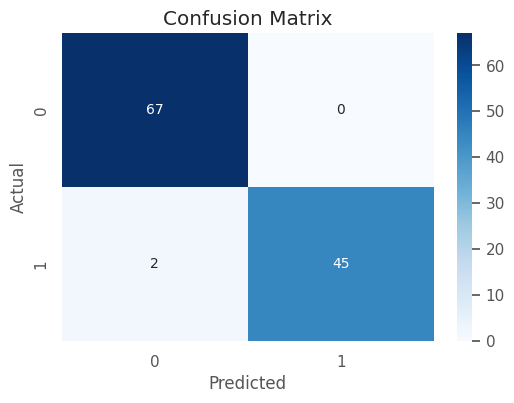

In [50]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Decision Tree Classifier

In [52]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : range(2, 32, 1 ),
    'min_samples_leaf' : range(1, 10 , 100),
    'min_samples_split' : range(2 , 10 , 1 ),
    'splitter' : ['best' , 'random']

}

grid_search = GridSearchCV(dtc , parameters ,n_jobs=-1 ,verbose=1 , cv = 5)
grid_search.fit(X_train , y_train)


Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10, 100),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [53]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [54]:
grid_search.best_score_

0.9516483516483516

In [55]:
dtc = DecisionTreeClassifier(criterion= 'entropy',
 max_depth = 13 ,
 min_samples_leaf = 1 ,
 min_samples_split = 8 ,
 splitter = 'random')

In [56]:
dtc.fit(X_train ,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=8,
                       splitter='random')

In [57]:
train_acc = accuracy_score(y_train , dtc.predict(X_train))
test_acc_dtc = accuracy_score(y_test , y_pred)
print(f'Train Decision tree Accuracy : {train_acc}')
print(f"Test Decision tree Accuracy : {test_acc_dtc}")

Train Decision tree Accuracy : 0.9824175824175824
Test Decision tree Accuracy : 0.9824561403508771


In [58]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[67  0]
 [ 2 45]]


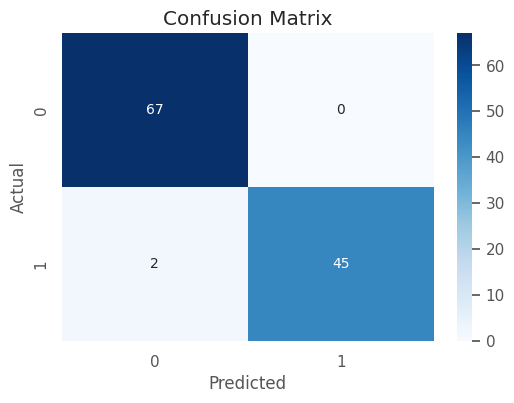

In [59]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

parameters = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(rfc , parameters , n_jobs=-1 , verbose=1 , cv=5)
grid_search.fit(X_train , y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=1)

In [62]:
grid_search.best_params_

{'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [63]:
grid_search.best_score_

0.9670329670329672

In [64]:
rfc = RandomForestClassifier(
 max_depth = 100,
 max_features = 3,
 min_samples_leaf = 4,
 min_samples_split = 10,
 n_estimators = 300
)

rfc.fit(X_train , y_train)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=300)

In [65]:
y_pred = rfc.predict(X_test)

In [66]:
train_acc = accuracy_score(y_train , rfc.predict(X_train))
test_acc_rf = accuracy_score(y_test , y_pred)
print(f'Train Random forest Accuracy : {train_acc}')
print(f"Test Random forest Accuracy : {test_acc_rf}")

Train Random forest Accuracy : 0.989010989010989
Test Random forest Accuracy : 0.9473684210526315


In [67]:
print(confusion_matrix(y_test , y_pred))

[[65  2]
 [ 4 43]]


In [68]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



## Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

parameters =  {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(gbc , parameters , n_jobs=-1 , verbose=1 , cv=5)
grid_search.fit(X_train , y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [70]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [71]:
grid_search.best_score_

0.9692307692307693

In [72]:
gbc = GradientBoostingClassifier(
    learning_rate = 0.1, max_depth = 3, n_estimators = 200
)

gbc.fit(X_train , y_train)

GradientBoostingClassifier(n_estimators=200)

In [73]:
y_pred = gbc.predict(X_test)

In [84]:
train_acc = accuracy_score(y_train , gbc.predict(X_train))
test_acc_gb = accuracy_score(y_test , y_pred)
print(f'Train Gradient boost Accuracy : {train_acc}')
print(f"Test Gradient boost Accuracy : {test_acc_gb}")

Train Gradient boost Accuracy : 1.0
Test Gradient boost Accuracy : 0.9912280701754386


## XGBoost Classifier

In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

parameters =  {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

grid_search = GridSearchCV(xgb , parameters ,n_jobs=-1 , verbose=1 , cv =5)
grid_search.fit(X_train , y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 1]},
             verbose=1)

In [76]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7}

In [77]:
grid_search.best_score_

0.9648351648351647

In [82]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 5, subsample = 0.7)
xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_pred = xgb.predict(X_test)

In [86]:
train_acc = accuracy_score(y_train , xgb.predict(X_train))
test_acc_xgb = accuracy_score(y_test , y_pred)
print(f'Train xgboost Accuracy : {train_acc}')
print(f"Test xgboost Accuracy : {test_acc_xgb}")

Train xgboost Accuracy : 1.0
Test xgboost Accuracy : 0.9912280701754386


In [87]:
models = pd.DataFrame({
    'model': ['Logistic Regression','KNN','SVC','Decision TreeClassifier','Random Forest Classifier','Gradient Boosting Classifer','XGBoost Classifier'],
    'score':[100*round(test_acc_lr,4), 100*round(test_acc_knn,4) , 100*round(test_acc_svc,4), 100*round(test_acc_dtc,4), 100*round(test_acc_rf,4) , 100*round(test_acc_gb,4), 100*round(test_acc_xgb,4)]
})

models.sort_values(by = 'score' , ascending=False)


,model,score
6,XGBoost Classifier,99.12
5,Gradient Boosting Classifer,99.12
2,SVC,98.25
3,Decision TreeClassifier,98.25
0,Logistic Regression,96.49
1,KNN,95.61
4,Random Forest Classifier,94.74


In [88]:
# Saving the best model
import pickle
model = svc
pickle.dump(model,open('Breast_cancer.pkl','wb'))

# ROC-AUC Curve

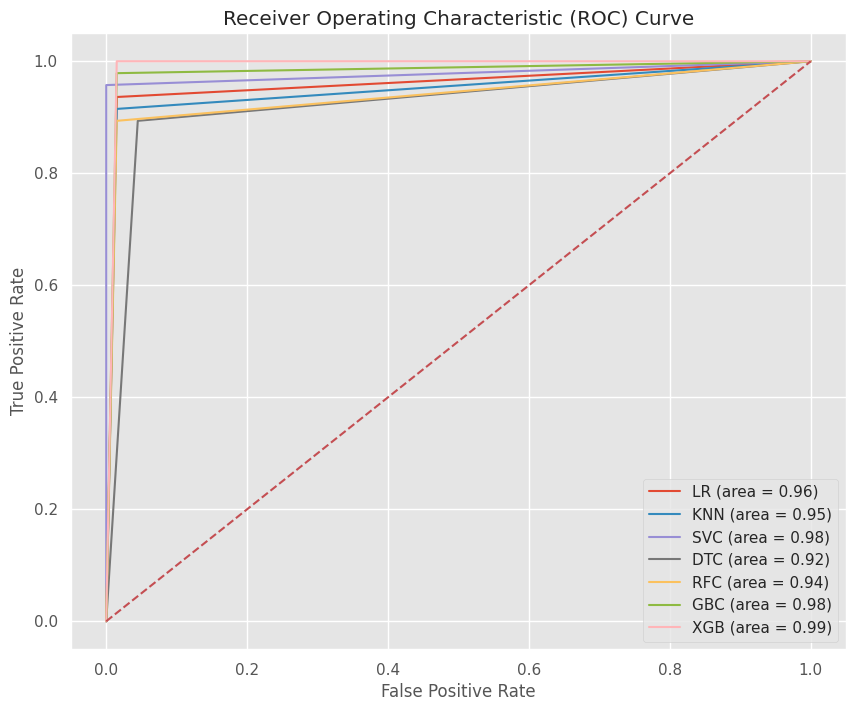

In [90]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

models = [{
    'label':'LR',
    'model': lr
}, {
    'label':'KNN',
    'model': knn
}, {
    'label':'SVC',
    'model': svc
}, {
    'label':'DTC',
    'model': dtc
}, {
    'label':'RFC',
    'model': rfc
}, {
    'label':'GBC',
    'model': gbc
}, {
    'label':'XGB',
    'model': xgb
}]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=m['label'] + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
